### 목표 : 많은 특성의 데이터셋에서 과대적합 해결
- 데이터 : perch3.csv
- 피쳐 : Length, Height, Wdith
- 타겟 : Weight
- [조건]
    - 특성 추가 => degree = 5로 설정
    - 특성을 기반으로 무게 예측 => 지도학습 + 회귀

In [1]:
import pandas as pd

In [2]:
filename = '../DATA/perch3.csv'
perchDF = pd.read_csv(filename)
perchDF.head()

,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415


In [4]:
perchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
 2   Height  56 non-null     float64
 3   Width   56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


In [3]:
featureDF = perchDF[perchDF.columns[1:]]
targetSR = perchDF['Weight']
featureDF.shape, targetSR.shape

((56, 3), (56,))

In [15]:
import matplotlib.pyplot as plt

# 피쳐 & 타겟 관계
def plot_features(features):
    for i, f in enumerate(features):
        plt.subplot(1, 3, i+1)
        plt.plot(targetSR, featureDF[f], 'o')
        plt.xlabel('Weight')
        plt.ylabel(f)
    plt.tight_layout()
    plt.show()

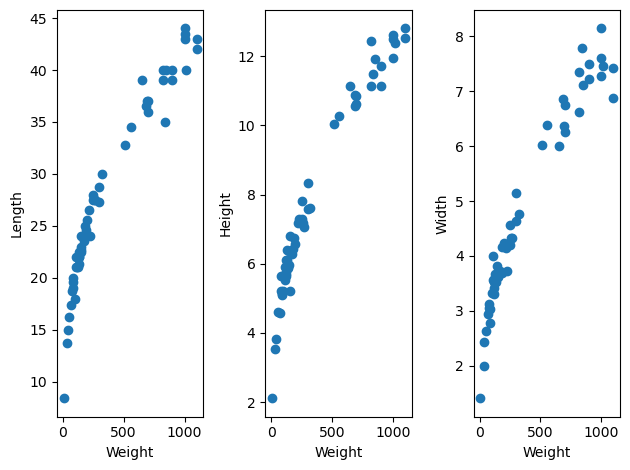

In [16]:
plot_features(featureDF.columns)    # 직선 형태는 아니지만, 곡선 형태 (양의 상관관계) 분포를 확인

(3) 데이터 가공 <hr>
- 특성 추가
- 특성 스케일링

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False) # 상수항(1) 제외
poly.fit(featureDF)

poly_feature = poly.transform(featureDF)
poly_feature.shape  # (56, 55) 56개 물고기 데이터, (4H5 - 1) = (8C3 - 1) = 55

(56, 55)

In [22]:
poly.get_feature_names_out()

array(['Length', 'Height', 'Width', 'Length^2', 'Length Height',
       'Length Width', 'Height^2', 'Height Width', 'Width^2', 'Length^3',
       'Length^2 Height', 'Length^2 Width', 'Length Height^2',
       'Length Height Width', 'Length Width^2', 'Height^3',
       'Height^2 Width', 'Height Width^2', 'Width^3', 'Length^4',
       'Length^3 Height', 'Length^3 Width', 'Length^2 Height^2',
       'Length^2 Height Width', 'Length^2 Width^2', 'Length Height^3',
       'Length Height^2 Width', 'Length Height Width^2', 'Length Width^3',
       'Height^4', 'Height^3 Width', 'Height^2 Width^2', 'Height Width^3',
       'Width^4', 'Length^5', 'Length^4 Height', 'Length^4 Width',
       'Length^3 Height^2', 'Length^3 Height Width', 'Length^3 Width^2',
       'Length^2 Height^3', 'Length^2 Height^2 Width',
       'Length^2 Height Width^2', 'Length^2 Width^3', 'Length Height^4',
       'Length Height^3 Width', 'Length Height^2 Width^2',
       'Length Height Width^3', 'Length Width^4', 'Height^5

In [25]:
## 훈련용, 테스트용 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(poly_feature, targetSR, random_state=5)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((42, 55), (42,), (14, 55), (14,))

In [26]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(x_train)

StandardScaler()

In [27]:
scaled_x_train = std_scaler.transform(x_train)
scaled_x_test = std_scaler.transform(x_test)

(4) 학습 진행 => 회귀 <hr>

In [28]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(scaled_x_train, y_train)

LinearRegression()

In [30]:
train_score = lr_model.score(scaled_x_train, y_train)
test_score = lr_model.score(scaled_x_test, y_test)
print(train_score, test_score)  # 완벽한 과대적합

1.0 -38.767868061603046


### 규제 : 가중치 값을 조절해서 과대적합 문제 해결 <hr>
- Ridge : 모든 피쳐에 가중치를 0에 가깝게 조절
- Lasso : 특정 피쳐의 가중치를 0으로 해서 차원 축소의 효과

[규제 1] Ridge

In [31]:
from sklearn.linear_model import Ridge

In [56]:
ridge_model = Ridge()
ridge_model.fit(scaled_x_train, y_train)

Ridge()

In [57]:
train_score = ridge_model.score(scaled_x_train, y_train)
test_score = ridge_model.score(scaled_x_test, y_test)
print(f'train_score : {train_score}', f'test_score : {test_score}', sep='\n')  # 매우 뛰어난 퍼포먼스

train_score : 0.9874355208005008
test_score : 0.9914491207423642


In [58]:
# 모델 파라미터
print(ridge_model.n_iter_, ridge_model.coef_, ridge_model.intercept_)

None [ 1.83176874e+00 -7.23677789e+00  1.03067055e+01  1.57775249e+01
  1.18446480e+01  1.67466597e+01  9.57952490e+00  1.47797173e+01
  2.48615142e+01  1.85163425e+01  1.67577526e+01  1.46142404e+01
  1.58382863e+01  1.38108100e+01  1.64490445e+01  1.56379186e+01
  1.39352928e+01  1.71480760e+01  2.50779150e+01  1.42694832e+01
  1.39921892e+01  6.23690826e+00  1.41806030e+01  6.32646330e+00
  2.93976268e+00  1.47629117e+01  7.00986521e+00  3.97399179e+00
  5.70584401e+00  1.56796396e+01  8.23737024e+00  5.75159002e+00
  8.24469917e+00  1.54675618e+01  5.86439125e+00  6.81074624e+00
 -5.88111799e+00  8.02129126e+00 -4.97701429e+00 -1.36851639e+01
  9.44134707e+00 -3.67900627e+00 -1.22792895e+01 -1.61590708e+01
  1.10232306e+01 -2.01766706e+00 -1.03096090e+01 -1.36546600e+01
 -1.21067571e+01  1.27255386e+01 -1.99919223e-02 -7.79070771e+00
 -1.04001988e+01 -7.93557014e+00 -7.20881695e-01] 365.6404761904762


In [59]:
# 최적의 규제 강도 설정 값 찾기
alphas = [0.1, 1.0, 10., 20., 30.]
ridge_score = [[], []]  # [0] : train score, [1] : test score

for a in alphas:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(scaled_x_train, y_train)
    train_score = ridge_model.score(scaled_x_train, y_train)
    test_score = ridge_model.score(scaled_x_test, y_test)
    ridge_score[0].append(train_score)
    ridge_score[1].append(test_score)

In [60]:
# 테스트 점수가 가장 높은 알파
best_alpha = alphas[ridge_score[1].index(max(ridge_score[1]))]
best_alpha

1.0

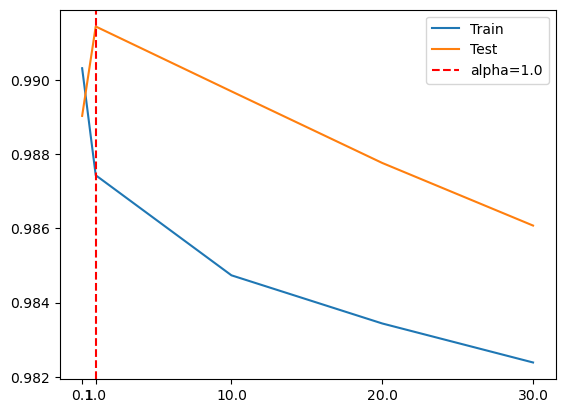

In [61]:
# 학습 및 테스트 점수 확인
import matplotlib.pyplot as plt

plt.plot(alphas, ridge_score[0], label='Train')
plt.plot(alphas, ridge_score[1], label='Test')
plt.xticks(alphas)
plt.axvline(best_alpha, linestyle='--', color='red', label=f'alpha={best_alpha}')
plt.legend()
plt.show()

[규제 2] Lasso

In [62]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(scaled_x_train, y_train)

C:\Users\kdp\.conda\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+03, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [69]:
train_score = lasso_model.score(scaled_x_train, y_train)
test_score = lasso_model.score(scaled_x_test, y_test)
print(f'train_score : {train_score}', f'test_score : {test_score}', sep='\n')  # 매우 뛰어난 퍼포먼스

train_score : 0.9865761752892273
test_score : 0.9912639062921962


In [70]:
print(ridge_model.n_iter_, ridge_model.coef_, ridge_model.intercept_)
# 최적의 규제 강도 설정 값 찾기
alphas = [0.1, 1.0, 10., 20., 30.]
lasso_score = [[], []]  # [0] : train score, [1] : test score

for a in alphas:
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(scaled_x_train, y_train)
    train_score = lasso_model.score(scaled_x_train, y_train)
    test_score = lasso_model.score(scaled_x_test, y_test)
    lasso_score[0].append(train_score)
    lasso_score[1].append(test_score)

None [11.58560914 11.16871618 10.39672634 10.43553996 10.30812209  9.39595309
 10.1819614   9.31995247  8.55296559  8.79731612  8.80333147  7.73056483
  8.82007477  7.77411194  6.85695994  8.84194644  7.8302827   6.95449212
  6.24012537  6.99048022  7.09000787  5.85098435  7.20258957  5.97647316
  4.89330485  7.32240759  6.11792627  5.06171886  4.18089483  7.44369106
  6.26958109  5.24897376  4.4085729   3.76301887  5.16108446  5.33263331
  3.9322057   5.51815866  4.11856325  2.86998652  5.71270869  4.32284579
  3.08804369  2.03691794  5.91116405  4.54039926  3.32875596  2.30556236
  1.48873436  6.1083241   4.7662634   3.5874804   2.6016167   1.82638393
  1.26751988] 365.6404761904762


C:\Users\kdp\.conda\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+04, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\kdp\.conda\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+03, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\kdp\.conda\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

In [71]:
# 테스트 점수가 가장 높은 알파
best_alpha = alphas[lasso_score[1].index(max(lasso_score[1]))]
best_alpha

1.0

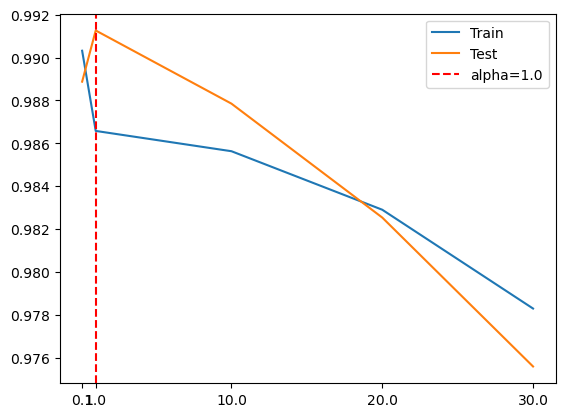

In [73]:
# 학습 및 테스트 점수 확인
import matplotlib.pyplot as plt

plt.plot(alphas, lasso_score[0], label='Train')
plt.plot(alphas, lasso_score[1], label='Test')
plt.xticks(alphas)
plt.axvline(best_alpha, linestyle='--', color='red', label=f'alpha={best_alpha}')
plt.legend()
plt.show()

In [68]:
# 모델 파라미터
print(lasso_model.n_iter_, lasso_model.coef_, lasso_model.intercept_)

1000 [ 0.          0.          0.          8.39678696  0.          0.
 13.70952971  0.         87.23199451 91.06954235 16.61716411  0.
 35.69479723  0.          0.         46.93195311  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         41.8984421
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.
 -0.        ] 365.6404761904762
